<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [ ]:
# !wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [ ]:
# !unzip -qu concrete_data_week4.zip

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [37]:
import keras
import numpy as np
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import load_model
from keras.applications import ResNet50, VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [7]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [9]:
train_generator = data_generator.flow_from_directory(
    '/mnt/data/concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')
target_dict = train_generator.class_indices
classes = list(target_dict.keys())
target_dict, classes

Found 30001 images belonging to 2 classes.


({'negative': 0, 'positive': 1}, ['negative', 'positive'])

In [10]:
dev_generator = data_generator.flow_from_directory(
    '/mnt/data/concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-118.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-76.779..144.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [43.32..102.32].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.68..130.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-70.68..127.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.68..142.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-38.779..100.061].
Clipping input data to the 

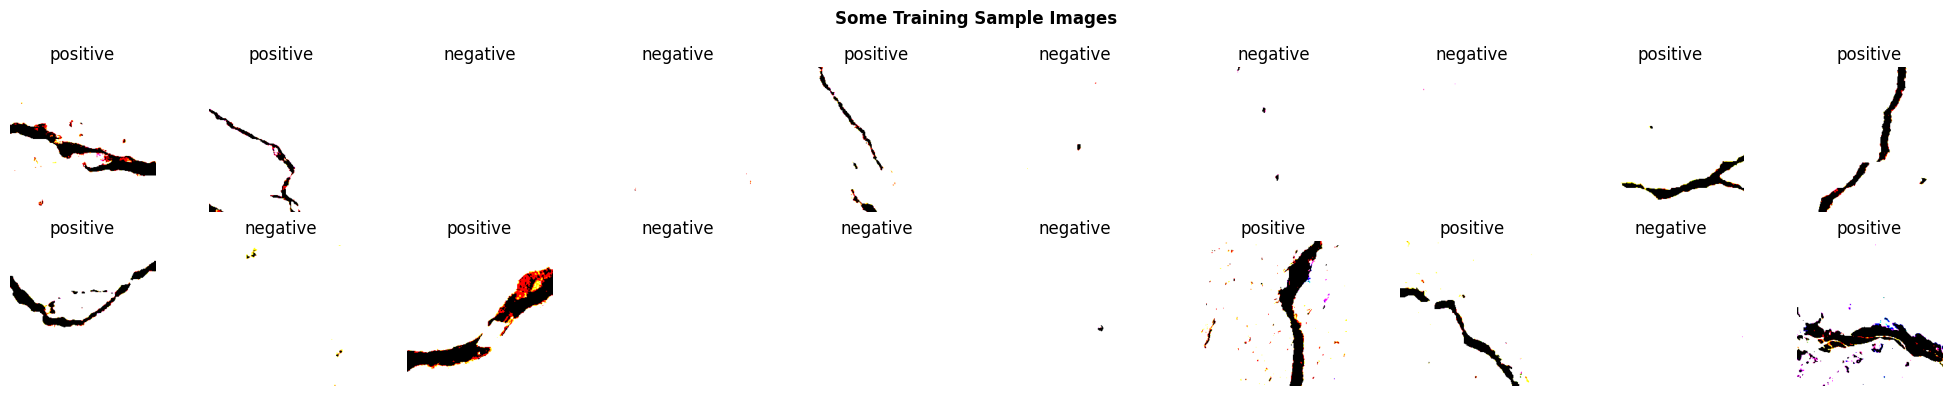

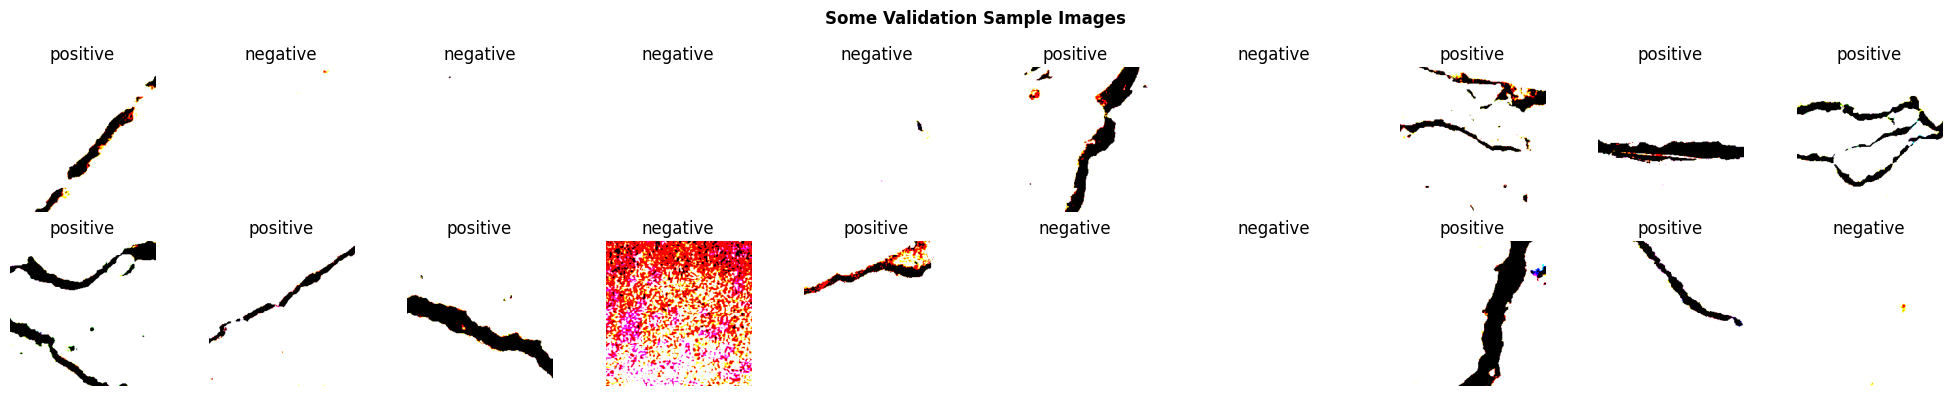

In [20]:
def show_generator_images(img_iter, title):
    plt.figure(figsize=(20, 4))
    a,b=next(iter(img_iter))
    for i in range(len(a)):
        ax = plt.subplot(2, 10, i+1)
        plt.imshow((a[i]), norm = "linear")
        plt.title(classes[np.argmax(b[i])])
        plt.axis('off')
        if i == 19:
            break
    plt.suptitle(title, fontweight="bold")
    plt.tight_layout()
show_generator_images(train_generator, "Some Training Sample Images")
show_generator_images(dev_generator, "Some Validation Sample Images")

In [21]:
vgg_model = Sequential()
vgg_model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))
vgg_model.add(Dense(num_classes, activation='softmax'))

W0000 00:00:1739664596.730426   14542 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [22]:
vgg_model.layers

[<Functional name=vgg16, built=True>, <Dense name=dense, built=True>]

In [23]:
vgg_model.layers[0].layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d, built=True>]

In [24]:
vgg_model.layers[0].trainable = False

In [25]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
vgg_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(dev_generator)
num_epochs = 2

In [31]:
history = vgg_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=dev_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

/home/tolu/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2


2025-02-16 00:20:33.662297: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1284505600 exceeds 10% of free system memory.
2025-02-16 00:20:34.022498: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1284505600 exceeds 10% of free system memory.
2025-02-16 00:20:35.471122: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 321126400 exceeds 10% of free system memory.
2025-02-16 00:20:35.652801: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 642252800 exceeds 10% of free system memory.
2025-02-16 00:20:36.342816: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 642252800 exceeds 10% of free system memory.


301/301 ━━━━━━━━━━━━━━━━━━━━ 4892s 16s/step - accuracy: 0.8848 - loss: 0.2965 - val_accuracy: 0.9949 - val_loss: 0.0301
Epoch 2/2
301/301 ━━━━━━━━━━━━━━━━━━━━ 4799s 16s/step - accuracy: 0.9944 - loss: 0.0271 - val_accuracy: 0.9960 - val_loss: 0.0183


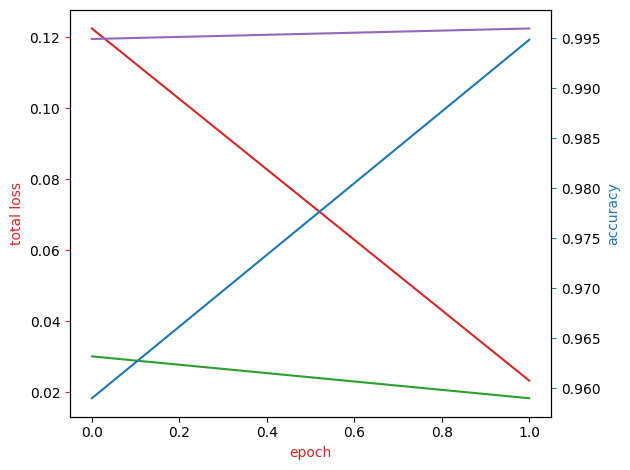

In [33]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(history.history['loss'], color=color)
ax1.plot(history.history['val_loss'], color='tab:green')
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  # you already handled the x-label with ax1
ax2.plot(history.history['accuracy'], color=color)
ax2.plot(history.history['val_accuracy'], color='tab:purple')
ax2.tick_params(axis='y', color=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [35]:
vgg_model.save('classifier_vgg_model.h5')

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [40]:
resnet_model = load_model('classifier_resnet_model.h5')

In [41]:
test_generator = data_generator.flow_from_directory(
    '/mnt/data/concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical',
    shuffle=False)

Found 500 images belonging to 2 classes.


In [42]:
resnet_score = resnet_model.evaluate(test_generator)
print(f"ResNet50 Performance: Loss = {resnet_score[0]}, Accuracy = {resnet_score[1]}")

/home/tolu/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 0.0035
ResNet50 Performance: Loss = 0.004989814944565296, Accuracy = 1.0


In [43]:
vgg_score = vgg_model.evaluate(test_generator)
print(f"VGG16 Performance: Loss = {vgg_score[0]}, Accuracy = {vgg_score[1]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 58s 12s/step - accuracy: 0.9989 - loss: 0.0167
VGG16 Performance: Loss = 0.014873415231704712, Accuracy = 0.9980000257492065


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [46]:
vgg_prediction = vgg_model.predict(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 59s 12s/step


In [47]:
resnet_prediction = resnet_model.predict(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step


In [62]:
print('Predictions for VGG16')
for i in range(5):
    # print(classes[int(vgg_prediction[i][1] > 0.5)])
    print(classes[np.argmax(vgg_prediction[i][1])], f'with confidence of {vgg_prediction[i][0]*100:.2f}%')

Predictions for VGG16
negative with confidence of 98.88%
negative with confidence of 95.87%
negative with confidence of 96.30%
negative with confidence of 98.80%
negative with confidence of 97.90%


In [63]:
for i in range(5):
    print(classes[int(resnet_prediction[i][1] > 0.5)], f'with confidence of {resnet_prediction[i][0]*100:.2f}%')

negative with confidence of 99.95%
negative with confidence of 99.09%
negative with confidence of 99.74%
negative with confidence of 99.87%
negative with confidence of 99.91%


### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).